In [86]:
import pandas as pd
import numpy as np
from collections import Counter
import re

from sklearn import preprocessing

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

import seaborn as sns
sns.set()
%matplotlib inline
import string

import os 
from datetime import datetime
import random
import math

from sklearn.model_selection import train_test_split

In [87]:
df = pd.read_csv('train.csv')
df.head() #如果不填，則回傳頭5行

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [88]:
#檢查看那些欄位有NaN值要處理
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [89]:
A = df['Cabin'][0]
print(A)
print(A == None)
print(pd.isnull(A))
print(pd.notnull(A))

A = np.nan
print(A)
print(A == None)
print(pd.isnull(A))
print(pd.notnull(A))

A = None
print(A)
print(A == None)
print(pd.isnull(A))
print(pd.notnull(A))

nan
False
True
False
nan
False
True
False
None
True
True
False


In [90]:
B_Cabins = []
for c in df['Cabin']: #把Cabin這個Column的值出來跑回圈
    print(type(c)) #印出Cabin的type
    if c.startswith('B'): #這一行如果c的type不是str的話，就會跳錯誤訊息，因為startswith是str的方法。
        B_Cabins.append(c)
B_Cabins

<class 'float'>


AttributeError: 'float' object has no attribute 'startswith'

In [91]:
C_Cabins = []
for c in df['Cabin']:
#     if type(c) != float and c.startswith('B'):
    if pd.notnull(c) and c.startswith('B'):
        C_Cabins.append(c)
C_Cabins

B_Cabins = []
for c in df['Cabin']:
#     if type(c) != float and c.startswith('B'):
    if pd.notnull(c) and c.startswith('B'):  #假設我加上一個條件，把type(c)!=float可以把NaN濾掉，不過這樣也會把真實的float值濾掉，所以比較好的做法還是pd.isnull(c)。
        B_Cabins.append(c)
B_Cabins

['B78',
 'B30',
 'B28',
 'B58 B60',
 'B86',
 'B19',
 'B4',
 'B80',
 'B77',
 'B94',
 'B49',
 'B58 B60',
 'B57 B59 B63 B66',
 'B18',
 'B35',
 'B96 B98',
 'B96 B98',
 'B49',
 'B37',
 'B79',
 'B73',
 'B18',
 'B38',
 'B39',
 'B22',
 'B41',
 'B50',
 'B35',
 'B71',
 'B51 B53 B55',
 'B5',
 'B20',
 'B5',
 'B101',
 'B57 B59 B63 B66',
 'B22',
 'B77',
 'B96 B98',
 'B3',
 'B20',
 'B82 B84',
 'B96 B98',
 'B102',
 'B69',
 'B28',
 'B51 B53 B55',
 'B42']

In [92]:
#資料的分布狀況: max, min, mean and median
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


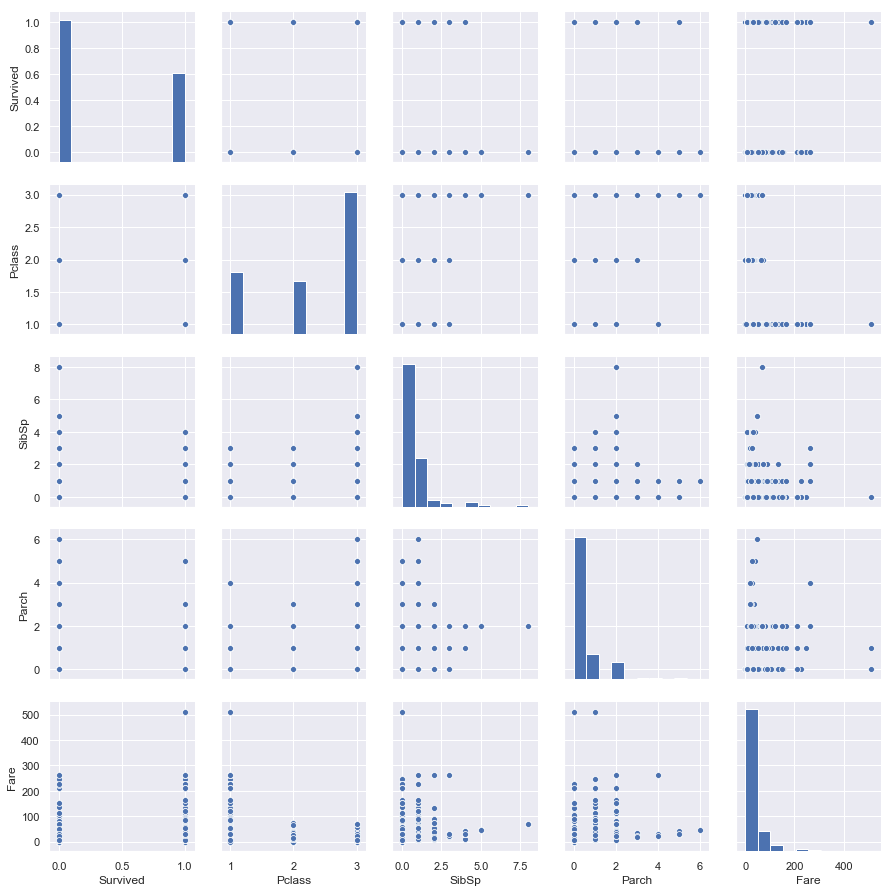

In [93]:
# 解釋變數之間的關係 由於這些資料不太能接受有NaN，所以我暫時先只放沒有NaN的欄位進去。

sns.pairplot(df[['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']])

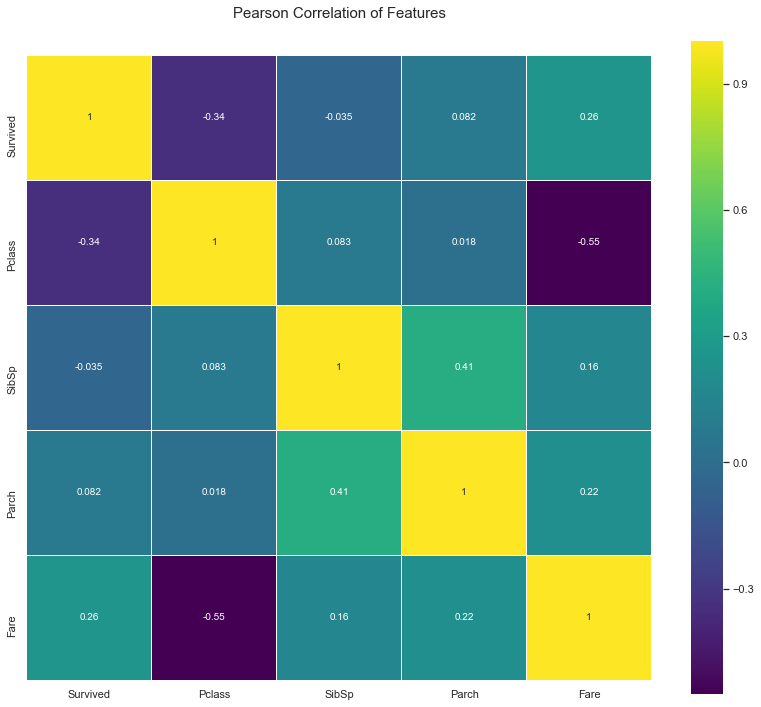

In [94]:
colormap = plt.cm.viridis
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df[['Survived', 'Pclass', 'SibSp', 'Parch', 'Fare']].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

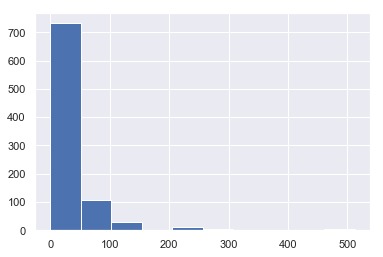

In [95]:
'''
簡單繪圖(查看某一變數的分布)
可以將某一欄位的所有資料plt.hist()方法中，便可以畫出直方圖。不過在上面的pairplot已經可以找到這樣的圖，
只是pairplot繪畫得比較久，如果你只關心某一變數的分布狀況，則可以使用這個方法
'''

plt.hist(df['Fare']) #histogram是直方圖的意思
plt.show()

In [96]:
#查看總長度
len(df)

#查看有哪些columns
df.columns #記得不要加括號

#查看有哪些indices
df.index

RangeIndex(start=0, stop=891, step=1)

In [97]:
#特定column或是row

# 根據row index進行索引
df.loc[0].head()
# 根據column index進行索引
df['Fare'].head()

0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [98]:
#多個columns或是rows

# 根據row index進行索引
df.loc[[2,5,7]].head()
# 根據column index進行索引
df[['Fare', 'Sex']].head()

,Fare,Sex
0,7.2500,male
1,71.2833,female
2,7.9250,female
3,53.1000,female
4,8.0500,male


In [99]:
#column與row同時索引
df.loc[0, 'Fare']

7.25

In [100]:
df.loc[[0,1,2], 'Fare']

0     7.2500
1    71.2833
2     7.9250
Name: Fare, dtype: float64

In [101]:
df.loc[range(3), ['Fare','Cabin']]

,Fare,Cabin
0,7.2500,NaN
1,71.2833,C85
2,7.9250,NaN


In [102]:
#indices_list
# show出Cabin是null值的
df.loc[pd.isnull(df['Cabin'])].head()
# show出Sex是male的
df.loc[df['Sex']=='male'].head()
# show出Age大於70的
df.loc[df['Age']> 70].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [103]:
indexing_bool_list = np.random.randint(0,2,size=len(df)) == 1 #我們首先先創造出一個，隨機的、只有True跟False的、與df等長的list
print(indexing_bool_list[:30]) #看一下它前30個長什麼樣
df.loc[indexing_bool_list].head()  #然後我們看看DataFrame會如何反應

[False False False False  True False  True  True False  True False False
  True False False  True  True False  True False  True  True  True False
 False  True False False False False]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S


In [104]:
'''
邊用了一個滿好用的計數器Counter，想要看一個list裡面甚麼樣的元素出現了幾次，
便可以使用這個工具，其import方式為from collections import Counter，記得collections要加上s，Counter的C要記得大寫
'''

print(len(pd.isnull(df['Cabin'])), Counter(pd.isnull(df['Cabin'])))
print(len(df['Sex']=='male'), Counter(df['Sex']=='male'))
print(len(df['Age']> 70), Counter(df['Age']> 70))

891 Counter({True: 687, False: 204})
891 Counter({True: 577, False: 314})
891 Counter({False: 886, True: 5})


In [105]:
#更新columns
columns = df.columns # 把原本的column記錄下來
df.columns = range(len(df.columns))  #指派0到11的range做為新的columns，務必確保新的column的長度與原本的columns長度要等長
df.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [106]:
df.columns = columns
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [107]:
# 指派一個值會讓索引到的每一個值，都被指派為新值
df.loc[df['Sex']=='male', 'Sex'] = 1
df.loc[df['Sex']=='female', 'Sex'] = 0
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C


In [108]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [109]:
# 指派一個list
std = df['Age'].std()  #算出標準差
mean = df['Age'].mean()  #算出平均數
size = len(df[pd.isnull(df['Age'])])  #算出null值的長度
age_null_random_list = np.random.randint(mean - std, mean + std, size=size)  #產生一個屆在一個標準差之內的隨機整數
df.loc[pd.isnull(df['Age']), 'Age'] = age_null_random_list  # 將隨機整數指派給null值
df['Age'].describe()

count    891.000000
mean      29.492896
std       13.545145
min        0.420000
25%       21.000000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64

In [110]:
#新增rows

num_NonSurvived = df.groupby('Survived').count()['PassengerId'][0]  # 死亡者的個數
num_Survived = df.groupby('Survived').count()['PassengerId'][1]  # 生還者的個數
duplicate_length = num_NonSurvived - num_Survived
print(num_NonSurvived)
print(num_Survived)
print(duplicate_length)

549
342
207


In [114]:
duplicate_indices = np.random.choice(df[df['Survived'] == 1].index, duplicate_length)  #choice可以直接幫你從一個list中，隨機挑選出指定size的item。這便則可以挑選出，特定size的index值。
df_duplicate = df.loc[duplicate_indices].copy()  # 索引出隨機挑選的index的row
print(len(df))
df = pd.concat([df, df_duplicate], ignore_index=True)  # 把挑選出來要負的的row，新增上原本的DataFrame
print(len(df))
df.head()

1098
1305


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Length
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,51
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,44
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,24


In [120]:
#新增columns(DataFrame的迴圈)

df['Name_Length'] = 0 # 先透過這種方式新增好欄位做準備，下面執行效能會好很多
def cal_namelength(row):
    if pd.notnull(row['Name']):
        row['Name_Length'] = len(row['Name'])
    else:
        row['Name_Length'] = 0
    return row
df = df.apply(cal_namelength, axis=1)
df.head()
# 記得: 1.要把新的df指派給原本的df才會成功更新。 2. axis要設定為1，才會以row為單位跑回圈。
# 順帶一提，其實Series也可以直接使用applyfunction。

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Length
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,51
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,22
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,44
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,24


In [127]:
#iterrows: 請大家非不得已不要使用這種方式，若是透過這種方法更新或是新增資料在原本的DataFrame中，效能上會是很大的負擔

df['Age_cat'] = 0
for idx, row in df.iterrows():  # 請務必記得加上idx，不然跑回圈的item會變成(idx, row)
    Age = row['Age']
    if Age < 20.315:
        Age_cat = 0
    elif Age < 40.21:
        Age_cat = 1
    elif Age < 60.1049:
        Age_cat = 2
    else:
        Age_cat = 3
    df.loc[idx, 'Age_cat'] = Age_cat
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
0,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,2
1,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,0
2,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,1
3,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,0
4,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S,0


In [123]:
#刪除資料一樣可以分為丟掉column或是row

df.drop(['Age_cat', 'Name_Length'], axis=1, inplace=True) #把['Age_cat', 'Name_Length']丟掉，記得axis=1代表丟的是columns。inplace則是代表把更新後的df指派給原本的df。
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [125]:
df_line0 = df.loc[:2].copy()
print(len(df))
df.drop(range(3), inplace=True)
print(len(df))
df = pd.concat([df, df_line0], ignore_index=True)
print(len(df))

1305
1302
1305


In [128]:
#groupby
df.groupby('Age_cat').count()  #每一個類別的次數
df.groupby('Age_cat').mean()  #每一個類別個項目的平均
df.groupby('Age_cat').median()  #每一個類別個別項目的中位數
df.groupby('Age_cat').std()  #每一個類別個別項目的標準差

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
Age_cat,,,,,,,,
0,277.196236,0.480362,0.742567,0.500702,6.510947,1.382772,0.800675,36.810136
1,249.871316,0.495997,0.863492,0.498868,5.577521,0.846774,0.775520,66.748621
2,242.564519,0.498395,0.878526,0.498395,5.285349,0.540599,0.805499,40.812245
3,234.074908,0.492103,0.802418,0.446576,5.413724,0.446576,0.800641,51.078572


In [131]:
#sort_values
df.sort_values('Age', ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cat
990,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",1,80.0,0,0,27042,30.0000,A23,S,3
624,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",1,80.0,0,0,27042,30.0000,A23,S,3
845,852,0,3,"Svensson, Mr. Johan",1,74.0,0,0,347060,7.7750,NaN,S,3
90,97,0,1,"Goldschmidt, Mr. George B",1,71.0,0,0,PC 17754,34.6542,A5,C,3
487,494,0,1,"Artagaveytia, Mr. Ramon",1,71.0,0,0,PC 17609,49.5042,NaN,C,3


In [133]:
'''
練習
'''

#把人名統整起來，並做好前處理

from string import punctuation
from collections import Counter
df_name = df[['Name']]
def processname(name):
    if type(name) == str:
        for pun in punctuation:
            name = name.replace(pun, " ")
        terms = [term for term in name.split() if term != " "]
        return terms
    else:
        return []
df_name['processed'] = df['Name'].apply(processname)
df_name.head()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,Name,processed
0,"McCarthy, Mr. Timothy J","[McCarthy, Mr, Timothy, J]"
1,"Palsson, Master. Gosta Leonard","[Palsson, Master, Gosta, Leonard]"
2,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","[Johnson, Mrs, Oscar, W, Elisabeth, Vilhelmina..."
3,"Nasser, Mrs. Nicholas (Adele Achem)","[Nasser, Mrs, Nicholas, Adele, Achem]"
4,"Sandstrom, Miss. Marguerite Rut","[Sandstrom, Miss, Marguerite, Rut]"


In [134]:
#排序每一個字出現多寡

all_terms = []
for terms in df_name['processed']:
    all_terms.extend(terms)
sorted(dict(Counter(all_terms)).items(), key=lambda x:x[1], reverse=True)

[('Mr', 617),
 ('Miss', 357),
 ('Mrs', 241),
 ('William', 101),
 ('Master', 65),
 ('John', 54),
 ('Henry', 53),
 ('Mary', 39),
 ('Anna', 32),
 ('Thomas', 31),
 ('Elizabeth', 30),
 ('Charles', 30),
 ('Edward', 28),
 ('George', 28),
 ('James', 26),
 ('Frederick', 23),
 ('Helen', 20),
 ('Alice', 20),
 ('Johan', 19),
 ('O', 19),
 ('Peter', 19),
 ('Margaret', 18),
 ('Richard', 18),
 ('Joseph', 17),
 ('Arthur', 17),
 ('Alexander', 16),
 ('H', 16),
 ('Annie', 15),
 ('Victor', 15),
 ('Fortune', 14),
 ('Marie', 14),
 ('Samuel', 14),
 ('Kate', 14),
 ('Jr', 13),
 ('Francis', 13),
 ('Mabel', 13),
 ('Frank', 13),
 ('Edith', 13),
 ('Carter', 13),
 ('Leonard', 12),
 ('Andersson', 12),
 ('Maria', 12),
 ('Ellen', 12),
 ('Ernest', 12),
 ('Albert', 12),
 ('Alfred', 12),
 ('Brown', 12),
 ('Catherine', 12),
 ('Louise', 12),
 ('Robert', 11),
 ('Ada', 11),
 ('Katherine', 11),
 ('Richards', 11),
 ('Jane', 11),
 ('Harper', 10),
 ('Bertha', 10),
 ('Sofia', 10),
 ('Norman', 10),
 ('de', 10),
 ('Agnes', 10),
 ('J

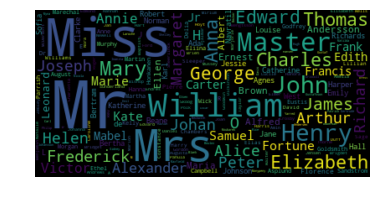

In [136]:
#畫出漂亮的文字雲

import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=dict(Counter(all_terms)))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()